In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
data = pd.read_csv("train.csv" , parse_dates=['Tarih'])
# data.set_index('Tarih' , drop= True , inplace=True)
data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [3]:
future_data = pd.read_csv("future.csv", parse_dates=['Tarih']).drop('Unnamed: 0' , axis = 1)
future_data.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2022-08-01 00:00:00,NaN
1,2022-08-01 01:00:00,NaN
2,2022-08-01 02:00:00,NaN
3,2022-08-01 03:00:00,NaN
4,2022-08-01 04:00:00,NaN


In [4]:
med = pd.read_csv('med.csv')
med['Tarih'] = pd.to_datetime(med['Tarih'])
med.head()

,Tarih
0,2019-12-23
1,2019-06-12
2,2019-01-25
3,2019-09-25
4,2019-03-29


# Describe the Data

In [5]:
data.shape

(40152, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tarih                   40152 non-null  datetime64[ns]
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 627.5 KB


In [7]:
# data['Tarih'] = pd.to_datetime(data['Tarih'])
# future_data['Tarih'] = pd.to_datetime(future_data['Tarih'])
# data.set_index('Tarih', inplace=True)
# future_data.set_index('Tarih' , inplace=True)

# data.info()

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dağıtılan Enerji (MWh),40152.0,1836.805287,426.066085,870.18328,1499.165048,1813.409221,2129.407998,3633.105297


# Plot the Data

## Feature Creators

In [9]:
from eval_metrics import eval_metrics
from feat_engs import create_datetimes, create_holiday_weekend, create_electricOutage_timeofDay, create_businessDay_cumulativeholidays, create_outage_rolling_percentages, create_hourly_sin_cos, create_seasons

In [10]:
# all_df = [train_df , val_df , test_df , future_df , data]
all_df = [data]

In [11]:
for df in all_df:
    create_datetimes(df)
    create_holiday_weekend(df)
    create_electricOutage_timeofDay(df,med)
    create_businessDay_cumulativeholidays(df)
    create_outage_rolling_percentages(df)
    create_hourly_sin_cos(df)
    create_seasons(df)
    df.drop('date' , axis=1 , inplace= True)
    df.set_index('Tarih' , inplace= True)

In [12]:
data.head()

,Dağıtılan Enerji (MWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,holiday,...,rolling_outages_24h,exp_avg_outages_24h,hour_sin,hour_cos,is_spring,is_summer,is_autumn,is_winter,is_weekend,is_weekday
Tarih,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,1593.944216,0,0,1,1,2018,1,1,1,1,...,0.0,0.0,0.000000,1.000000,0,0,0,0,0,-1
2018-01-01 01:00:00,1513.933887,1,0,1,1,2018,1,1,1,1,...,0.0,0.0,0.258819,0.965926,0,0,0,0,0,-1
2018-01-01 02:00:00,1402.612637,2,0,1,1,2018,1,1,1,1,...,0.0,0.0,0.500000,0.866025,0,0,0,0,0,-1
2018-01-01 03:00:00,1278.527266,3,0,1,1,2018,1,1,1,1,...,0.0,0.0,0.707107,0.707107,0,0,0,0,0,-1
2018-01-01 04:00:00,1220.697701,4,0,1,1,2018,1,1,1,1,...,0.0,0.0,0.866025,0.500000,0,0,0,0,0,-1


## Good Function

In [13]:
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=False):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	dff = pd.DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(dff.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(dff.shift(-i))
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = pd.concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg

In [14]:
data.values.shape

(40152, 26)

## Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
## full data without resampling
values = data.values

# integer encode direction
# ensure all data is float
# values = values.astype('float32')


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values.reshape(-1,1))

In [16]:
scaled

array([[4.38882224e-01],
       [2.75170893e-04],
       [2.75170893e-04],
       ...,
       [2.75170893e-04],
       [2.75170893e-04],
       [0.00000000e+00]])

In [17]:
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)

In [18]:
# reframed

In [19]:
# reframed = reframed.iloc[:,0:2]

In [20]:
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
# print(reframed.head())

In [21]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# data_scaled = scaler.fit_transform(data)
# train_scaled = scaler.transform(X_train_temp)
# test_scaled = scaler.transform(X_test_temp)

# val_scaled = scaler.transform(X_val_temp)

In [22]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0,1))
# train_scaled = scaler.fit_transform(X_train_temp)
# test_scaled = scaler.transform(X_test_temp)

# val_scaled = scaler.transform(X_val_temp)

## Train | Test Split

In [23]:
# split into train and test sets
# values = reframed.values

#values = values.astype('float32')

n_train_time = 1460*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

In [24]:
train[:, 0]

array([1593.94421564, 1513.93388671, 1402.61263652, ..., 2115.96297773,
       2022.20285729, 1891.77759344])

In [25]:
# split into input and outputs
X_train, y_train = train[:, :], train[:, 0]
X_test, y_test = test[:, :], test[:, 0]

In [26]:
X_train.shape

(35040, 26)

In [27]:
# split into input and outputs
# X_train, y_train = train[:, :-1], train[:, -1]
# X_test, y_test = test[:, :-1], test[:, -1]

In [28]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(35040, 1, 26) (35040,) (5112, 1, 26) (5112,)


In [29]:
# X_test_temp = data.loc[data.index > '2022-07-23 23:00:00'].copy()
# X_train_temp = data.loc[data.index <= '2022-07-23 23:00:00'].copy()

# X_val_temp = X_train_temp[-96:]
# X_train_temp = X_train_temp[:-96]

In [30]:
# print(f"X_data Shape : {X_data.shape}")
# print(f"X_train Shape : {X_train.shape}")
# print(f"X_test Shape : {X_test.shape}")
# print(f"X_val Shape : {X_val.shape}")
# print(f"X Shape : {X.shape}")

# Reshape

Buraya dikkat !

In [31]:
# def packager(data_scaled , train_scaled, val_scaled, test_scaled, window_size=24):
#     X_data , y_data , X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], [], [], []
    
    
#     for i in range(window_size, len(data_scaled)):
#         X_data.append(data_scaled[i-window_size:i, 0])
#         y_data.append(data_scaled[i, 0])

#     for i in range(window_size, len(train_scaled)):
#         X_train.append(train_scaled[i-window_size:i, 0])
#         y_train.append(train_scaled[i, 0])

#     for i in range(window_size, len(val_scaled)):
#         X_val.append(val_scaled[i-window_size:i, 0])
#         y_val.append(val_scaled[i, 0])

#     for i in range(window_size, len(test_scaled)):
#         X_test.append(test_scaled[i-window_size:i, 0])
#         y_test.append(test_scaled[i, 0])

#     X_data, y_data = np.array(X_data), np.array(y_data)
#     X_train, y_train = np.array(X_train), np.array(y_train)
#     X_val, y_val = np.array(X_val), np.array(y_val)
#     X_test, y_test = np.array(X_test), np.array(y_test)

#     X_data = np.reshape(X_data, (X_data.shape[0], X_train.shape[1], 1))
#     X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#     X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
#     X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#     X = np.concatenate((X_train, X_val, X_test), axis=0)
#     y = np.concatenate((y_train, y_val, y_test), axis=0)

#     return X_data , y_data , X_train, y_train, X_val, y_val, X_test, y_test, X, y

In [32]:
# X_data , y_data , X_train, y_train, X_val, y_val, X_test, y_test, X, y = packager(data_scaled , train_scaled, val_scaled, test_scaled)

# FINAL Model

In [33]:
import tensorflow as tf

# Seed ayarlamak
seed_value = 53
tf.keras.utils.set_random_seed(seed_value)

# Modelling Time

## Manual Create the model

In [34]:
X_train.shape

(35040, 1, 26)

In [35]:
y_train.shape

(35040,)

In [36]:
window_size = 24
batch_size = 8

from keras.models import Sequential
from keras.layers import LSTM, Dense , BatchNormalization , Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping

# Model oluşturma
model = Sequential()
# model.add(LSTM(50, input_shape=(window_size, data.shape[1]) ,return_sequences = False))
model.add(LSTM(100, input_shape = (1,X_train.shape[2]) ,return_sequences=True))
# model.add(LSTM(30, return_sequences=False))
model.add(Dropout(0.2))
model.add(LSTM(50, input_shape = (1,X_train.shape[2]) ,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(26))
model.compile(loss='mse', optimizer='adam')




reduce_lr = ReduceLROnPlateau(factor = 0.1 , patience=3)
early_stop = EarlyStopping(monitor='val_loss' , patience=6)
model_check = ModelCheckpoint(filepath=r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\100-50(batch8)\\model-{epoch:03d}-{val_loss:.5f}.h5', monitor="val_loss", verbose=1)

# # Modeli eğitme
# model.fit(X_train , y_train, epochs=30, batch_size = batch_size , validation_data=(X_test , y_test) , callbacks= [reduce_lr , early_stop , model_check] , shuffle=False )
history = model.fit(X_train, y_train, epochs=50, batch_size= 16, validation_data=(X_test, y_test), callbacks= [reduce_lr , early_stop, model_check] , shuffle=False)


# Modeli değerlendirme
mse = model.evaluate(X_test , y_test)
print('Test MSE: %.3f' % mse)

Epoch 1/50
2190/2190 [==============================] - ETA: 0s - loss: 3362619.7500
Epoch 1: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\100-50(batch8)\model-001-3358624.00000.h5
2190/2190 [==============================] - 9s 3ms/step - loss: 3362619.7500 - val_loss: 3358624.0000 - lr: 0.0010
Epoch 2/50
2174/2190 [============================>.] - ETA: 0s - loss: 3062281.5000
Epoch 2: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\100-50(batch8)\model-002-3072019.25000.h5
2190/2190 [==============================] - 6s 3ms/step - loss: 3069392.7500 - val_loss: 3072019.2500 - lr: 0.0010
Epoch 3/50
2185/2190 [============================>.] - ETA: 0s - loss: 2797434.5000
Epoch 3: saving model to C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\100-50(batch8)\model-003-2801083.50000.h5
2190/2190 [==============================] - 6s 3ms/step - loss: 2798227.0000 - val_loss: 280108

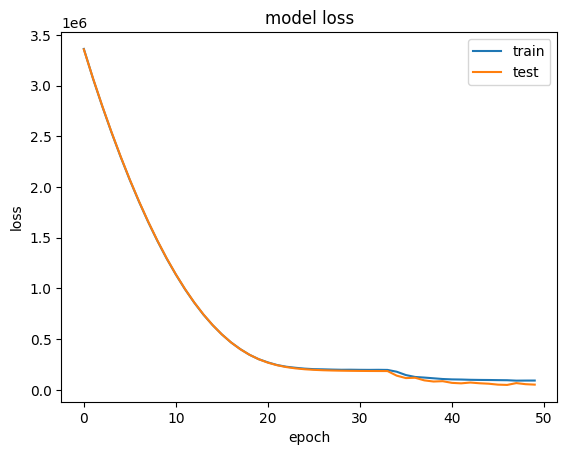

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
# make a prediction
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0],X_train.shape[2]))

160/160 [==============================] - 1s 2ms/step


In [44]:
y_pred

array([[1955.9531, 1955.9319, 1955.7211, ..., 1955.7767, 1955.5139,
        1955.5438],
       [1486.9487, 1487.252 , 1487.0219, ..., 1487.3387, 1487.3363,
        1487.3168],
       [1486.9487, 1487.252 , 1487.0219, ..., 1487.3387, 1487.3363,
        1487.3168],
       ...,
       [2139.7102, 2139.5376, 2139.5503, ..., 2139.2554, 2139.4163,
        2139.4119],
       [2139.7102, 2139.5376, 2139.5503, ..., 2139.2554, 2139.4163,
        2139.4119],
       [2139.7102, 2139.5376, 2139.5503, ..., 2139.2554, 2139.4163,
        2139.4119]], dtype=float32)

In [ ]:
# invert scaling for forecast
inv_yhat = np.concatenate((y_pred, X_test[:, -X_train.shape[2]:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [ ]:
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, -X_train.shape[2]:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

## Import the model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\Emincan\Desktop\Gdz\gdz-competition\Checkpoints\Single_Target\\50(batch8)\\model-017-0.00013.h5")

# Eval Metric

In [ ]:
# from eval_metrics import eval_metrics

### Predictions

In [ ]:
data.shape

In [ ]:
X_data.shape

In [ ]:
X.shape

In [ ]:
data_last_seq = scaler.transform(data.values)[-24:]
# data_last_seq

In [ ]:
data_last_seq

In [ ]:
data_last_seq.shape

In [ ]:
# X[-1]

In [ ]:
# X_data[-1]

In [ ]:
# Elimizdeki verilerin son 24'ü bir sonraki tahmini yapmak için kullanılacak
# last_window = X_data[-1]
last_window = data_last_seq

# 31 gün boyunca tahminler yapmak için bir boş tahmin dizisi oluşturun
predictions = []

for i in range(31*24):
    # Tahmin edilen değerleri ölçeklendirmek için son pencereyi yeniden şekillendirin
    last_window_reshaped = last_window.reshape(1, 24, 1)

    # Son pencereyi kullanarak bir tahmin yapın
    prediction = model.predict(last_window_reshaped , verbose = 0)[0][0]

    # Tahmini tahmin listesine ekleyin
    predictions.append(prediction)

    # Tahmin edilen değeri son pencerenin sonuna ekleyin
    last_window = np.append(last_window[1:], prediction)

# Tahminleri geri ölçeklendirin
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Tahminlerinizi burada kullanabilirsiniz

### Visualize Predictions

In [ ]:
# predictions

In [ ]:
future_data['Dağıtılan Enerji (MWh)'] = predictions
future_data

In [ ]:
target_data = data[data.index.month == 8]

In [ ]:
target_data_2018 = target_data[target_data.index.year == 2018]
target_data_2019 = target_data[target_data.index.year == 2019]
target_data_2020 = target_data[target_data.index.year == 2020]
target_data_2021 = target_data[target_data.index.year == 2021]

In [ ]:
# target_data_2018

In [ ]:
target_data.mean()

In [ ]:
future_data.values.mean()

In [ ]:
preds_plot(data , future_data , target_data )

In [ ]:
prop_preds = pd.read_csv(r'C:\Users\Emincan\Desktop\Gdz\gdz-competition\Baskasının_Calısmaları\PROPHET_yabancı.csv' , parse_dates=['Tarih']).set_index('Tarih' , drop = True)
preds_plot(data , prop_preds , target_data )

In [ ]:
create_submission(predictions.reshape(-1) , 2)

In [ ]:
# model.save("../models/lstm_model_Manual_1.h5")

In [ ]:
# Done.